In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.optimize import nnls

In [17]:
def save_img(array, title):
    plt.figure()
    plt.imshow(array)
    plt.title(title)
    plt.savefig(title+'.png')

In [18]:
kernel_size = 3
sigma = kernel_size / 2
x, y = np.indices((kernel_size, kernel_size))-kernel_size // 2
kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel

array([[0.64118039, 0.8007374 , 0.64118039],
       [0.8007374 , 1.        , 0.8007374 ],
       [0.64118039, 0.8007374 , 0.64118039]])

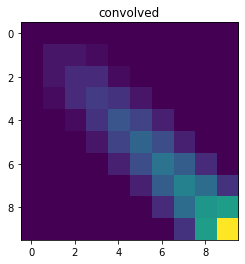

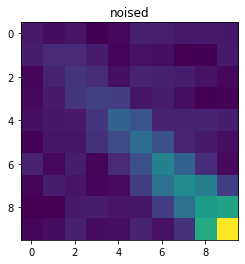

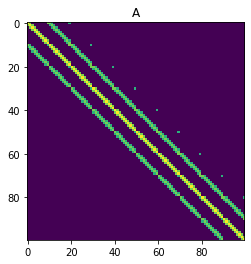

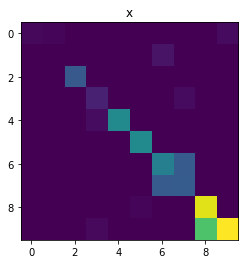

In [30]:
img_size = 10
source = np.diag(np.arange(img_size))
convolved = convolve(source, kernel)
save_img(convolved, 'convolved')
noise_amplitude = 2
noised = (convolved+noise_amplitude*(1-2*np.random.rand(*convolved.shape)))
save_img(noised, 'noised')
b = noised.reshape(-1)
A=np.zeros(noised.shape + source.shape)
#метод произвольных градиентов упрощает эту задачу, позволяя не строить такой огромный А(см лекцию 27.10)

for noised_idx in np.ndindex(noised.shape):
    for kernel_idx in np.ndindex(kernel.shape):
        k_idx = (kernel_idx[0] - kernel_size // 2, kernel_idx[1] - kernel_size // 2)
        source_idx = (noised_idx[0] + k_idx[0], noised_idx[1] + k_idx[1])
        if (source_idx[0] < 0 or source_idx[0]>=source.shape[0] or source_idx[1]>=source.shape[1]):
            continue
        A[noised_idx+source_idx] = kernel[kernel_idx]
A = A.reshape(noised.size, source.size)
save_img(A, 'A')
x = nnls(A, b)[0]
x = x.reshape(source.shape)
save_img(x, 'x')